# Data Preprocessing
- Dropped unnecessary columns like row index and flight number.
- Encoded the class column into binary (0 for Economy, 1 for Business).
- Used factorize and get_dummies to convert categorical variables into numeric format for modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [4]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [5]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [6]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


In [7]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [8]:
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [9]:
print('Max Duration:', + df['duration'].max())
print('Min Duration:', + df['duration'].min())
print('Median:', + df['duration'].median())

Max Duration: 49.83
Min Duration: 0.83
Median: 11.25


# Feature Engineering
In this section we converted  all relevant categorical variables like airline, source city, destination, departure/arrival time into dummy variables for machine learning.

In [11]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [12]:
df.stops = pd.factorize(df.stops)[0]

In [13]:
df = df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival')).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='destination')).drop('destination_city', axis=1)

In [14]:
df.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


# Training the Regression Model
In this section we train the model by first splitting the data into training and testing and then trained the Random Forest Regressor.

We then evaluated the model by looking at its R² score, MAE, MSE, and RMSE.



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x, y = df.drop('price', axis=1), df.price

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
reg = RandomForestRegressor()

reg.fit(x_train, y_train)

RandomForestRegressor()

In [18]:
reg.score(x_test, y_test)

0.9855704923998229

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(x_test)

print('R2:', r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.9855704923998229
MAE: 1065.0830490056267
MSE: 7458155.043665935
RMSE: 2730.962292611514


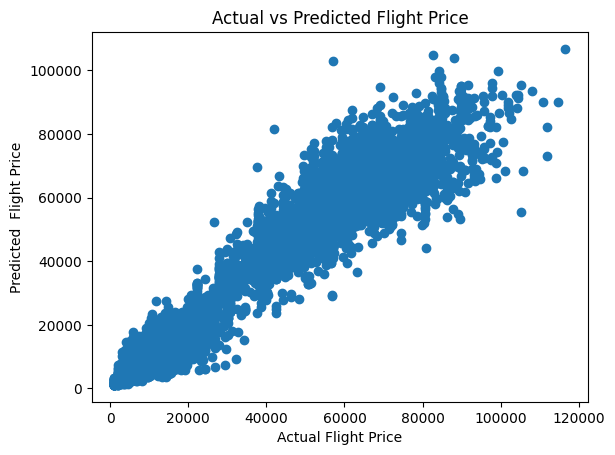

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted  Flight Price')
plt.title('Actual vs Predicted Flight Price')
plt.show()

In [23]:
df.price.describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


# Feature Importance
In this section we calculated which features contributeed the most to the model's decisions.

We can see from the result that the flight's class was the most dominant.

In [25]:
importances = dict(zip(x.columns, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', np.float64(0.879999948825923)),
 ('duration', np.float64(0.05752505469149479)),
 ('days_left', np.float64(0.018584955204857437)),
 ('airline_Air_India', np.float64(0.00638369774825602)),
 ('source_Delhi', np.float64(0.003619600801273919)),
 ('airline_Vistara', np.float64(0.0035046794924960484)),
 ('destination_Delhi', np.float64(0.0033055596593044934)),
 ('source_Mumbai', np.float64(0.0021793456922371943)),
 ('destination_Mumbai', np.float64(0.0019146320602645066)),
 ('stops', np.float64(0.0018508862295983854)),
 ('destination_Kolkata', np.float64(0.0018017550265338397)),
 ('source_Kolkata', np.float64(0.001797595316005056)),
 ('arrival_Evening', np.float64(0.0015844413127118833)),
 ('destination_Hyderabad', np.float64(0.0015294430643079714)),
 ('destination_Bangalore', np.float64(0.0012786099314415107)),
 ('source_Hyderabad', np.float64(0.001240866483152721)),
 ('arrival_Night', np.float64(0.001130606656630368)),
 ('departure_Evening', np.float64(0.001110583708092593)),
 ('

In [26]:
df.days_left.describe()

,days_left
count,300153.000000
mean,26.004751
std,13.561004
min,1.000000
25%,15.000000
50%,26.000000
75%,38.000000
max,49.000000


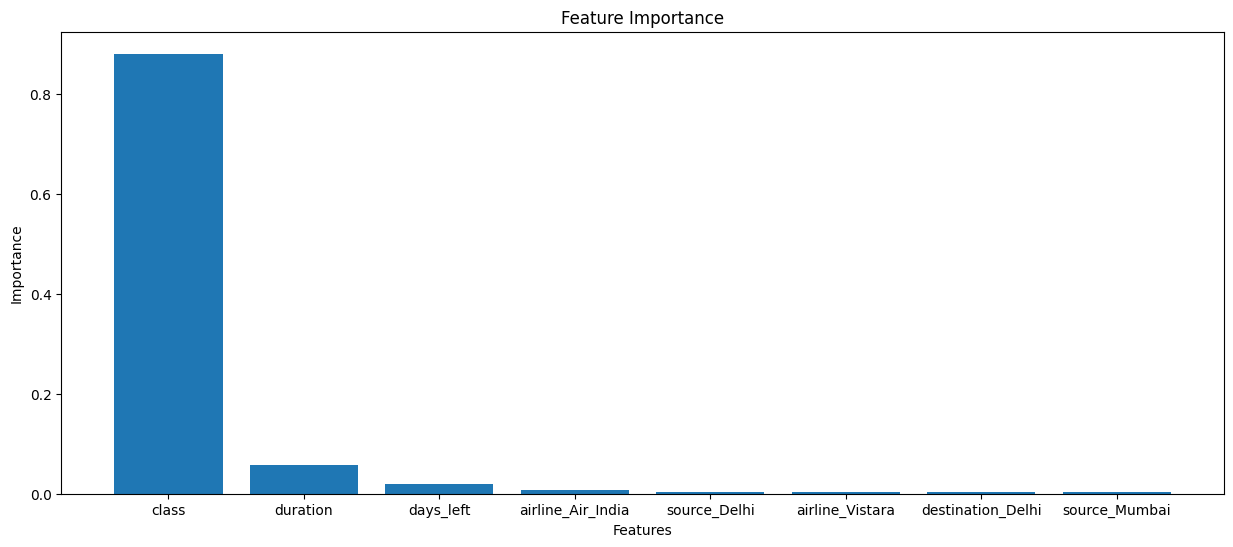

In [31]:
plt.figure(figsize=(15, 6))
plt.bar([x[0] for x in sorted_importances[:8]], [x[1] for x in sorted_importances[:8]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Hyperparameter Tuning
In this section we tuned the model using RandomizedSearchCV and managed to slightly improve the model's performance.

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': (100, 200, 300),
    'max_depth':(None, 10, 20, 30, 40, 50),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0, 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(reg, param_distributions=param_dist, n_iter=2, cv=3,
                scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(x_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [50]:
best_regressor.score(x_test, y_test)

0.9864957030107974

In [51]:
y_pred = best_regressor.predict(x_test)

print('R2:', r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

R2: 0.9864957030107974
MAE: 1080.6849740313144
MSE: 6979943.009278268
RMSE: 2641.958177049415


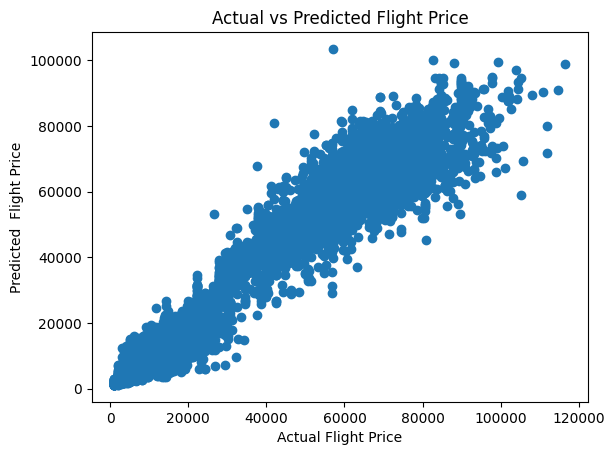

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted  Flight Price')
plt.title('Actual vs Predicted Flight Price')
plt.show()